$$\textbf{Branching Cell Trajectories modelled by the Modern Hopfield models}$$
$$\text{Keerthana Sudarshan}$$
$$\text{Supervised by Dr. Archishman Raju}$$
$$\textit{NCBS Summer Internship 2024}$$
<hr>

In the code below, I attempt to model cell differentiation via the Modern Hopfield Model. Building on the <tt>MixedNets</tt> model detailed in <i>Long Sequence Hopfield Memory</i> by Chaudhry et. al., we modify it first by allowing for unique weights $\lambda_{ij}$ between each pattern $i$ and $j$, rather than a single $\lambda$ that connects one pattern to the next in a linear chain. This modification allows us create binary trees, where the system can take one path or another by chooding between one pattern and another. The second modification made is to take into account a set of <i>biases</i>- these indicate, at every potential branching point, the probability of the cell choosing one branch over the other. This gives a final distribution of cells that is non-uniform in the number cells per pattern. 
<hr>

# Introduction to the Hopfield Model

The Hopfield model is spin-glass system that has what is known as associative memory. The model consists of a set of $N$ neurons or spins, that take either discrete values ($\in \{\pm 1\}$) or continuous values ($\in [0, 1]$), and in which each spin is connected to every other spin by weight matrix $W_{ij}$. The associative memory refers to the manner in which the Hopfield model can store a number of patterns, which are convetionally encoded into the weight matrix according to the formula:

$$w_{ij} = \frac{1}{N}\sum_{\mu=1}^p \xi_i^{\mu} \xi_j^{\mu}$$

where $p$ is the number of patterns being encoded, and $\xi_i^{\mu}$ indicates the $i^{th}$ spin of the $\mu^{th}$ pattern. This is essentially the sum over the outer product of each pattern. The energy of the model is given by:

$$ H = - \frac{1}{2} \sum_{i,j =1}^N \sigma_i w_{ij} \sigma_j$$

Where $\sigma_i$ is the state of the $i^{th}$ spin in the current configuration. We can see that the energy is minimized when the overlap between the current state and one of the overlap states is maximized. When evolving the system, we typically start in some randomized state, and then evolve by minimizing the energy of the model, spin by spin. This results in the model approaching the configuration of one of the encoded patterns. The update rule by minimizing energy can be written as:

$$\sigma_i = sgn\left( \sum_{j=1}^N T_{ij} \sigma_j\right) = sgn\left( \sum_{j=1}^N \frac{1}{N} \sum_{\mu = 1}^p \xi_i^{\mu} \xi_j^{\mu}\sigma_j\right)$$

We also more formally define the overlap of a current configuration with one of the stored patterns as:

$$m^{\mu} = \sum_{i=1}^N \xi^{\mu}_i \sigma_i$$


# Established Modifications

With this basic model in place, we now look at modified versions of the same. The Hopfield model itself has a capacity of approximately $C \sim 0.14N$, meaning that only about $C$ patterns can be encoded until the model no longer retrieves one of the stored patterns with certainty. The model is instead likely to retreive a suprious pattern, some liner combination of the actual stored patterns. This low capacity is improved upon in a version of the Hopfield model, which has an energy of:

$$H = -   \sum_{\mu=1}^p \left(\sum_{i =1}^N \xi^{\mu}_i \sigma_i \right)^n$$

where $n$ is some whole number, resulting in a higher polynomial power (where the original is quadratic). This 'deepens' the potential well of each stored pattern, increasing the capacity to $p_{max} \approx \frac{1}{2(2n - 3)!!} \frac{N^{n-1}}{\ln(N)}$. Another significant change is the addition of a dynamic pattern storage: instead of the system approaching one pattern and staying in that configuration, we want the system to move from one pattern configuration, to another, to another. This was initially achieved by Kantor and Sompolinski (1986), encoding a limit cycle of patterns by using the update rule:

$$\sigma_i(t) = sgn\left( \sum_{j} w^S_{ij}\sigma_j (t) + \lambda w^L_{ij}\bar{\sigma}_j (t) \right)$$

$w^S$ and $w^L$ are the <b>symmetrical short time</b> connection and the <b>assymetrical long time</b> connection respectively, allowing us to define a timescale $\tau$ between the system retrieving one pattern and the next. They are defined as:

$$w_{ij}^S = \frac{1}{N} \sum_{\mu} \xi_i^{\mu} \xi_j^{\mu} \ \ \text{ and } \ \ w_{ij}^L = \frac{1}{N} \sum_{\mu} \xi_i^{\mu + 1} \xi_j^{\mu} $$

The delayed $\bar{\sigma}_j (t)$ can be defined in multiple ways, and essentially just incorporates information from past states of the system, allowing us to control the time between the system retreiving one pattern and the next. In the code below, I have used a step-function kernel, which effectively calculates a moving average of the past $\tau$ number of configurations:

$$\bar{\sigma}_j (t) = \frac{1}{\tau} \sum_{t' = 0}^{\tau} \sigma_j (t-t')$$


The factor $\lambda$ indicates the strength of the connection of one pattern to the next. If $\lambda<1$, then the system will stay in the existing pattern; $\lambda>1$, the system will move from one pattern to the next when the time $\tau$ has elapsed. However, if the value of $\lambda$ is too large, the current pattern will get destabilized even before $\tau$ steps. Chaudhury et. al. (2023) in their <tt>MixedNets</tt> model essentially combines the limit cycles of patterns with the increased capacity of the Modern Hopfield Model:

$$\sigma_i (t) = sgn\left[ \sum_{\mu=1}^p  \xi^{\mu}_i \left( \frac{1}{N} \sum_j \xi_j^{\mu} \sigma_j \right)^{n_S} + \lambda \xi^{\mu +1}_i \left( \frac{1}{N} \sum_j \xi_j^{\mu} \bar{\sigma}_j \right)^{n_L} \right]$$

# Biological Motivation

The idea is to use the Hopfield model to examine cell development and differentiation. The state of the model at any given point can be thought of as the gene expression of the cell, where the case of discrete units is an extremized/simplified version- each gene is either expressed or not. Thus, a certain configuration of the model represents a certain cell state, and limit cycle of specified patterns represents a cell moving through pre-determined states of development. However, we also want to look at cell differentation- cells beginning in the same state (stem cells of some kind) and over the course of the development, taking on different states to perform different tasks. We look at a simplified model of differentiation, modelled as a binary tree- each cell, as it approches a bifurcation, takes one of two possible subsequent states. This division can be repeated multiple times. We also want to have some specified distribution of final cells. For example, if there are 8 different possible end states for the cells, we might want there to be more cells in state 2 than in any other state, or twice as many cells in state 3 than in state 4, etc. Both of these are acheived by altering the <tt>MixedNets</tt> model so that there are unique $\lambda$ weights to each possible pair of patterns.


# Cell differentiation
To add unique $\lambda$ weights, we use a $p\times p$ matrix called $\Lambda$, and modifify the assymetric long time connection term as:

$$\lambda \xi^{\mu +1}_i \left( \frac{1}{N} \sum_j \xi_j^{\mu} \bar{\sigma}_j \right)^{n_L} \longrightarrow \mathbf{\xi_i}^T \Lambda \mathbf{\bar{m}_i}$$

$\mathbf{\xi_i}$ is a vector made up of $\xi^{\mu}_i$ for each of thr $p$ patterns, and $\mathbf{\bar{m}_i}$ is a vector of the delayed overlaps of the spin with each of the $p$ patterns. (For an individual spin, the delayed overlap is calculated as $\bar{m}^{\mu}_i = \frac{1}{N-1} \sum_{j \neq i} \xi^{\mu}_j \bar{\sigma}_j$). To given an example if we had three patterns, and we wanted the first pattern to bifurcate to the next two, we would have:

$$\begin{pmatrix}
        \xi_i^{1} & \xi_i^{2} & \xi_i^{3}
    \end{pmatrix}
    \begin{pmatrix}
        \lambda_{11} & \lambda_{12} & \lambda_{13} \\
        \lambda_{21} & \lambda_{22} & \lambda_{23} \\
        \lambda_{31} & \lambda_{32} & \lambda_{33} \\
    \end{pmatrix}
    \begin{pmatrix}
        \bar{m}_i^{1} \\ \bar{m}_i^{2} \\ \bar{m}_i^{3}
    \end{pmatrix} = \begin{pmatrix}
        \xi_i^{1} & \xi_i^{2} & \xi_i^{3}
    \end{pmatrix}
    \begin{pmatrix}
        0 & 0 & 0 \\
        1.5 & 0 & 0 \\
        1.5 & 0 & 0 \\
    \end{pmatrix}
    \begin{pmatrix}
        \bar{m}_i^{1} \\ \bar{m}_i^{2} \\ \bar{m}_i^{3}
    \end{pmatrix}$$

This formulation allows us to create birfurcations as many times as we want, connecting each pattern to it successors using $\Lambda$.  Below, I have simulated this model, and added further modifications to allow for bias in the branches, noise, etc.

## Defining functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.facecolor'] = 'white'
import scipy.interpolate as interpolate
import scipy.stats
from scipy.signal import savgol_filter
from tqdm import tqdm

In [2]:
@njit
def random_config(L, prob=0.5):
    """ Creates a random array of spins with values +1 and -1. Default probability is 0.5 for +1. 
        L: Length of array of spins
    """
    array =  np.ones(L)
    for i in range(L):
        r = np.random.uniform(0,1)
        if r>prob:
            array[i] *= -1

    return array

@njit
def random_config_cont(L):
    """ Creates a random array of spins with values from 0 to -1. 
        L: Length of array of spins
    """
    array =  np.ones(L)
    for i in range(L):
        array[i] = np.random.uniform(0,1)-0.5
    return array

In [3]:
@njit
def p_overlap(spins, pattern):
    '''
    Calculates the overlap between the current spin configuration and each pattern in the provided array.
    Returns array of length equal to the number of patterns in the input array.
    '''
    p, L = np.shape(pattern)
    m_arr = np.zeros(p)
    for i in range(p):
        m_arr[i] = 1/L * np.sum(spins*pattern[i])
    return m_arr

@njit
def mh_energy(pattern, spins, n):
    '''
    Calculates the energy of the system depending on the current configuration and the value n of the exponent.
    '''
    p, L = np.shape(pattern)
    E = 0
    for i in range(0,p):
        arr = np.sum(spins*pattern[i])
        E += arr**n
    E *= -1
    return E

@njit
def seq_overlap(spins, pattern):
    '''
    Overlap of current configuration with each given pattern, calculated as per DENSEnet model, which exclude the product of a spin with itself.
    '''
    p, L = np.shape(pattern)
    m_arr = np.zeros((p,L))
    for pat in range(p):
        for spin in range(L):
            m_arr[pat][spin] = 1/(L-1) * (np.sum(spins*pattern[pat]) - spins[spin]*pattern[pat][spin])
    return m_arr

@njit
def branch_seq_sweep(pattern, spins, T, n, tau, spins_history, run, lambd):
    '''
    Performs a single sweep of the model (i.e. updates each of the spins in the configuration once) and returns the final config.
    _INPUTS_
    * pattern: (pxL) Array containing p number of patterns being stored in the model, each a configuration of L spins.
    * spins: The current configuration of the model, with L spins.
    * T: Temperature of the model
    * n: The power of the energy of the modern Hopfield model.
    * tau: The time delay set between the model moving from one pattern to the next.
    * spins_history: An array storing all past configurations of the system.
    * run: A count of how many time a 'sweep' has been performed.
    * lambd: The lambda factor indicating the strength of the perturbation term relative to the stability term.
    
    _OUTPUT_
    * spins: The updated spin configuration
    '''
    p, L = np.shape(pattern)    # Retrieve no. of patterns and neurons
    m_arr = seq_overlap(spins, pattern)    # Calculate current pattern overlap
    delay_spins = np.sum(spins_history[(run-tau) : run], axis=0)/tau    # Calculate average over last tau configuratios
    m_arr_delay = seq_overlap(delay_spins, pattern)
    w_sum = np.zeros(L)
    for k in range(p):
        w_sum += (pattern[k] * m_arr[k]**n)  # stability term (staying in the existing pattern)
    
    for k in range(L):
        for smth in range(len(lambd)):
            w_sum[k] += np.sum(lambd[smth] * (m_arr_delay[:,k]**n)) * pattern[smth,k]     # Perturbation term (pushing to the next pattern)
        f = 1/(1 + np.exp(-2*w_sum[k]/T))    # Calculating the probability of the spin being in the state 1.
        r = np.random.uniform(0,1)
        if r<f:
            spins[k] = 1
        else:
            spins[k] = -1
    return spins
        
@njit
def branch_seq_run(pattern, N, T, n, tau, lambd, start=0):
    '''
    Given a set of patterns stored in the Modern hopfield model, evolves the system for some number of steps.
    _INPUTS_
    * pattern: (pxL) Array containing p number of patterns being stored in the model, each a configuration of L spins.
    * N: Number of steps to evolve the system by from the initial state.
    * T: Temperature of the model.
    * n: The power of the energy of the modern Hopfield model.
    * tau: The time delay set between the model moving from one pattern to the next.
    * lambd: The lambda factor indicating the strength of the perturbation term relative to the stability term.
    * start: The pattern in which the system should be initialized.

    _OUTPUTS_
    * spins_history: An array storing all past configurations of the system.
    * pattern: Output the same pattern list we started with.
    * H_arr: The energy of the system at stage.
    * overlaps: An array containing the overlap of the system with each of the 'p' patterns at every stage of the evolution.
    '''
    p, L = np.shape(pattern)    # p = no. of patterns; L = no. of neurons
    
    initial_spins = pattern[start]    # Set initial spin configuration to be the starting pattern
    spins = np.copy(initial_spins)
    
    H_arr = np.zeros(N+1)     # Create array to store energy at each time step
    H_arr[0] = mh_energy(pattern, spins, n)
    overlaps = np.zeros((N+1, p))     # Create array to store the overlap with each pattern for each time step.
    overlaps[0] = p_overlap(spins, pattern)
    spins_history = np.zeros((N+1, L))    # Create array to store spin configuration at each time step
    spins_history[0] = np.copy(spins)
    
    for run in range(N):
        spins = branch_seq_sweep(pattern, spins, T, n, tau, spins_history, run, lambd)     # Get new spin configuration
        H_arr[run+1] = mh_energy(pattern, spins, n)
        overlaps[run+1] = p_overlap(spins, pattern)
        spins_history[run+1] = np.copy(spins)
        
    return spins_history, pattern, H_arr, overlaps

In [4]:
@njit
def create_binary(num_pat, w=1.2):
    '''
    Creates a complete binary tree, in order, up till the node num_pat. The nodes are counted from 0 to (num_pat-1).
    * num_pat: The maximum node number permitted.
    * w: The default value assigned to each non-zero element in the weight matrix.

    _Outputs_
    * lambda_matrix: a (num_pat x num_pat) matrix containing the connection weights between each pattern. The matrix is such that w_ij =/= 0 if i is a node connected to j below it, and 0 otherwise.
    * paths: The array of all paths that can be taken down the binary tree, starting at 0. Paths all padded out to the max length.
    * biases: For each pattern that can go to two other patterns, what is the likelihood of going to one over the other.
    * expected_dist: An array containing the expected final distribution of cells, given the set of biases, and assuming all start at the first pattern.
    '''

    # This block of code creates the lambda_matrix. It assigns a value of w wherever a pattern is connected to another. In the case of these binary trees, each node is connected to two nodes below. lambda_{ij} being non-zero indicates that the system can go from pattern j to pattern i.
    i = 0
    lambda_matrix = np.zeros((num_pat, num_pat))
    paths = [[0]]
    while 2*i+2 <= num_pat:
        lambda_matrix[2*i+1, i] = w
        if 2*i+2 != num_pat:
            lambda_matrix[2*i+2, i] = w
        i += 1
        
    path_len = int(np.log2(num_pat))+1    # Defines maximum path length along the patterns (i.e. system goes through patterns 1->2->...)
    num_paths = (num_pat+1)//2    # Defines the number of possible paths a cell can take.
    paths = np.ones((num_paths, path_len))     # Array to store possible paths

    # This block of code calculates and stores the various paths that the system can take through the binary tree of patterns.
    for i in range(num_paths):
        val = num_pat - i
        temp_list = []
        while val>0:
            temp_list.append(val)
            val = val//2
        temp_list.reverse()
        if len(temp_list)<path_len:
            temp_list.append(temp_list[-1])
        paths[i] = temp_list

    n_nodes = (num_pat-1)//2    # The number of node birfurcations.
    biases = np.zeros((n_nodes, 2))
    for i in range(n_nodes):
        biases[i][0] = np.round(np.random.uniform(0,1), 2)    # Assign some random value drawn from a uniform distribution as the bias
        biases[i][1] = 1 - biases[i][0]   # Calculate corresponding probability of taking the other path.

    expected_dist = np.ones((num_pat+1)//2)    # an array of length equal to the number of possible paths
    for i in range((num_pat+1)//2):
        val = num_pat-1-i
        if i==0 and val%2==1:
            val = (val-1)//2
        while val>0:
            rem = (val+1)%2
            val = (val-1)//2
            expected_dist[-i-1] *= biases[val, rem]
        
    return lambda_matrix, paths-1, biases, expected_dist
    

@njit
def compress(arr, length):
    '''
    Takes in an array 'arr' and converts it to an array of length 'length'. If the original length of the array is less that 'length', it gets padded witht he last value of the original array. If the original length is greater, there is data loss.
    '''
    l = len(arr)
    new_arr = [arr[0]]
    for i in range(l-1):
        if arr[i] != arr[i+1]:
            new_arr.append(arr[i+1])

    while len(new_arr)<length:
        new_arr.append(new_arr[-1])
    new_arr = new_arr[:length]
        
    return np.array(new_arr)

## Observing the pattern cycle

Below, I have simulated a simple cycle of patterns.

In [7]:
L = 100
num_pat = 7
# creating random patterns to find
pat_arr =  np.ones((num_pat,L))
for j in range(num_pat):
    pat_arr[j] = random_config(L)

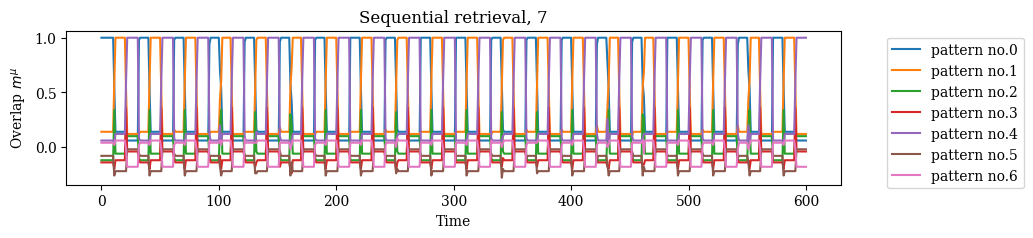

In [8]:
N = 600
T = 0.01
lambda_matrix, paths, biased, dist = create_binary(num_pat, w=1.2)
# Modifying the matrix so that the last pattern of each path returns to the first, so we get cycles
lambda_matrix[0,3] = 1.2
lambda_matrix[0,4] = 1.2
lambda_matrix[0,5] = 1.2
lambda_matrix[0,6] = 1.2
spins_history, pattern, H_arr, overlaps = branch_seq_run(pattern=pat_arr, N=N, T=T, n=4, tau=10, lambd=lambda_matrix)
op = p_overlap(pat_arr[1], pat_arr)

plt.figure(figsize=(10,2))
for i in range(num_pat):
    plt.plot(overlaps[:,i], label='pattern no.'+str(i))

plt.title("Sequential retrieval, "+str(num_pat))
plt.ylabel(r"Overlap $m^{\mu}$")
plt.xlabel("Time")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

## Adding Stochasticity

In the graph above, we can see that every time the system returns to the first pattern, it takes the same path, even though it has a choice between four different paths in total ([0,1,3], [0,1,4], [0,2,5], [0,2,6]) as defined by the binary tree. This is due to the deterministic nature of the model. If we want the system to sometimes choose a new path, we can introduce noise into the system. Instead of taking the <i>sign</i> of whatever result we calculate from the weights as the new value for each spin, we call the calculated quantity $h_i$ and further calculate:
$$ f(h_i) = \frac{1}{1 + e^{-2h_i / T}}$$

where $T$ is an effective temperature of the system. The higher the temperature, the greater the noise, and therefore the greater the randomness in the choice of pattern. With this addition, the spin $\sigma_i$ is updated as follows: a random number $r$ is generated froma uniform random distribution between 0 and 1. If $ r< f(h_i)$, then $\sigma_i = 1$. Otherwise, $\sigma_i = -1$.

Below, I have shown the result of the same pattern cycle, when the temperature is a more significant value. We can see that the system soemtimes chooses a different path.

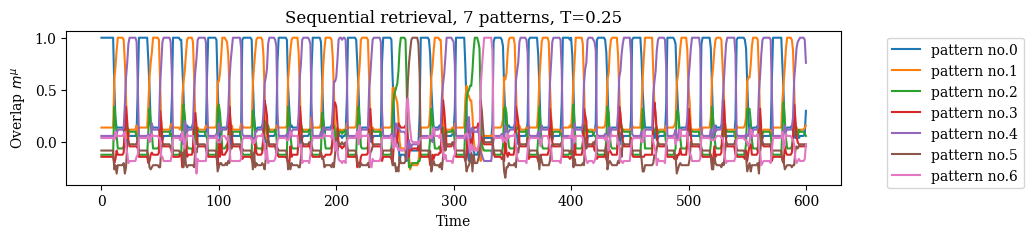

In [12]:
N = 600
T = 0.25
lambda_matrix, paths, biased, dist = create_binary(num_pat, w=1.5)
lambda_matrix[0,3] = 1.5
lambda_matrix[0,4] = 1.5
lambda_matrix[0,5] = 1.5
lambda_matrix[0,6] = 1.5
spins_history, pattern, H_arr, overlaps = branch_seq_run(pattern=pat_arr, N=N, T=T, n=4, tau=10, lambd=lambda_matrix)
op = p_overlap(pat_arr[1], pat_arr)

plt.figure(figsize=(10,2))
for i in range(num_pat):
    plt.plot(overlaps[:,i], label='pattern no.'+str(i))

plt.title("Sequential retrieval, "+str(num_pat)+" patterns, T="+str(T))
plt.ylabel(r"Overlap $m^{\mu}$")
plt.xlabel("Time")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

## Adding Bias

We further want to control how many cells end up taking one path over another at each bifurcation. The simplest way to do this is by changing the weights $\lambda_{ij}$ for the two patterns, coupled with a noisy system. For example, if pattern 1 bifurcates to patterns 2 and 3, but we want more cells to go to pattern 2 than 3, we can simply set $\lambda_{21} \sim 1.1$ and $\lambda_{21} \sim 1.3$. The effect of this is observed below.

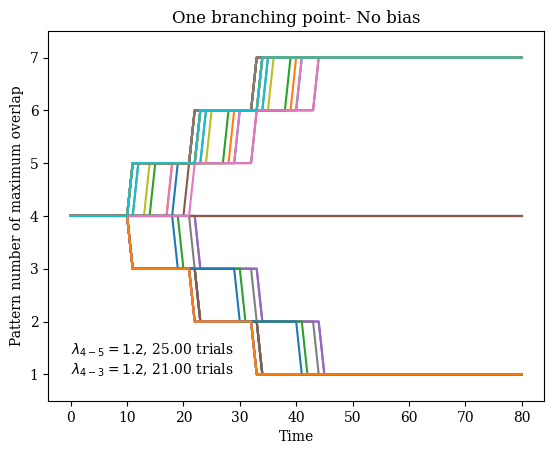

In [13]:
L = 100
N = 80
iterations = 50
path_arr = np.zeros((iterations, N+1))

for it in range(iterations):
    sequence = np.array([[4,5,1], [5,6,1], [6,7,1], [4,3,1], [3,2,1], [2,1,1]])
    num_pat = int(np.max(sequence))
    lambda_matrix = np.zeros((num_pat, num_pat))

    pat_arr =  np.ones((num_pat,L))
    for j in range(num_pat):
        pat_arr[j] = random_config(L)
    
    for x in range(len(sequence)):
        a, b, w = sequence[x]
        a = a-1; b = b-1
        lambda_matrix[b, a] = 1.2*w
    spins_history, pattern, H_arr, overlaps = branch_seq_run(pattern=pat_arr, N=N, T=0.02, n=4, tau=10, lambd=lambda_matrix, start=3)
    
    for i in range(N+1):
        guess = np.argmax(overlaps[i])
        path_arr[it][i] = guess

n_b1 = 0
n_b2 = 0
for i in range(iterations):
    if path_arr[i][-1] == 0:
        n_b1 +=1
    elif path_arr[i][-1] == num_pat-1:
        n_b2 +=1
    plt.plot(path_arr[i]+1)
    plt.ylim(0.5, num_pat+0.5)

plt.xlabel('Time')
plt.ylabel('Pattern number of maximum overlap')
plt.title(r'One branching point- No bias')
plt.text(0, 1, r"$\lambda_{4-5} = 1.2$, %3.2f trials" "\n" r"$\lambda_{4-3} = 1.2$, %3.2f trials"%(n_b2, n_b1))
plt.show()

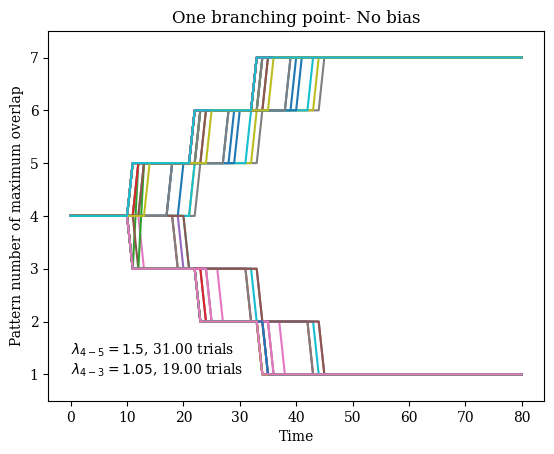

In [16]:
L = 100
N = 80
iterations = 50
path_arr = np.zeros((iterations, N+1))

for it in range(iterations):
    sequence = np.array([[4,5,1], [5,6,1], [6,7,1], [4,3,1], [3,2,1], [2,1,1]])
    num_pat = int(np.max(sequence))
    lambda_matrix = np.zeros((num_pat, num_pat))

    pat_arr =  np.ones((num_pat,L))
    for j in range(num_pat):
        pat_arr[j] = random_config(L)
    
    for x in range(len(sequence)):
        a, b, w = sequence[x]
        a = a-1; b = b-1
        lambda_matrix[b, a] = 1.05*w
    lambda_matrix[5][4] = 1.5   # Biasing the system towards one of the branches
    spins_history, pattern, H_arr, overlaps = branch_seq_run(pattern=pat_arr, N=N, T=0.02, n=4, tau=10, lambd=lambda_matrix, start=3)
    
    for i in range(N+1):
        guess = np.argmax(overlaps[i])
        path_arr[it][i] = guess

n_b1 = 0
n_b2 = 0
for i in range(iterations):
    if path_arr[i][-1] == 0:
        n_b1 +=1
    elif path_arr[i][-1] == num_pat-1:
        n_b2 +=1
    plt.plot(path_arr[i]+1)
    plt.ylim(0.5, num_pat+0.5)

plt.xlabel('Time')
plt.ylabel('Pattern number of maximum overlap')
plt.title(r'One branching point- No bias')
plt.text(0, 1, r"$\lambda_{4-5} = 1.5$, %3.2f trials" "\n" r"$\lambda_{4-3} = 1.05$, %3.2f trials"%(n_b2, n_b1))
plt.show()

## Bias via Feedback

Biologically, the control of how many cells end up in one state over another would happen via a feedback mechanism. For example, let a certain set of cells be able to develop into either type A or type B cells, and the goal is to have an equal number of both. An increasing number of type A cells being produced would lead to the over/underproduction of some enzyme, which in turn stimulates the conversion of the stem cell into a type B cell, or inhibits the development into a type A cell. To mimic this, we establish a similar feedback mechanism. We simulate a large number of cells (each represented by a set of Hopfield spins) to evolve along a set of branches. Each cell begins evolving after a randomised delay. At the start, $\Lambda$ has equal weights for each of the branches, making it equally likely for cells to choose any path. Once a cell has chosen a certain path, this gets recorded, and the cell count of that path is increased. At the end of every cell update, $\Lambda$ is also updated for every branch point, according to the biases set. 

For example, if pattern 1 birfurcates to pattern 2 and pattern 3, and we have set the probability of choosing pattern 2 to be 0.8, then we modify $\Lambda$ as:

$$\lambda_{21} = \lambda_{31}\times (1 + \text{expected ratio} - \text{current ratio}) = \lambda_{31}\times \left(1 + 0.8 - \frac{\text{no. of cells that chose pattern 2}}{\text{no. of cells that chose pattern 2 or 3}}\right)$$

This simple heuristic rule ensures that the cells follow the expected distribution of the branches. This is demonstrated below.

In [17]:
@njit
def cells_run(num_cells, pattern, T, n, tau, lambd, biases, max_delay=10):
    p, L = np.shape(pattern)    # p = no. of patterns; L = no. of neurons
    path_len = int(np.log2(p))+1
    N = 2*path_len*tau + max_delay
    
    overlaps = np.zeros((num_cells, N+1, p))     # Create array to store the overlap with each pattern for each time step, for each cell
    spins_history = np.zeros((num_cells, N+1, L))    # Create array to store spin configuration at each time step, for each cell
    
    for cell in range(num_cells):
        overlaps[cell][0] = p_overlap(pattern[0], pattern)
        spins_history[cell][0] = np.copy(pattern[0])     # initializing each cell in the first pattern

    final_dist = np.zeros((p+1)//2)
    delays = np.random.uniform(0, max_delay, num_cells).astype(np.int32)    # imposing a delay on the evolution of each cell
    cell_count = np.zeros(p)    # Initialize the count of how many cells have visited each state
    
    for run in range(N):
        for cell in range(num_cells):
            if run>=delays[cell]:    # If the delay has elapsed, the cell starts evolving.
                spins_history[cell][run+1] = branch_seq_sweep(pattern, spins_history[cell][run], T, 
                                                              n, tau, spins_history[cell], run-delays[cell], lambd) # update the cell state
                overlaps[cell][run+1] = p_overlap(spins_history[cell][run+1], pattern)    # update the overlaps of the cell
                current_pattern = np.argmax(overlaps[cell][run+1])    # update the 'current state' of the cell

                # If the cell has reached a new state, add to the cell count of that state
                if overlaps[cell][run+1][current_pattern] > overlaps[cell][run][current_pattern]:
                    if overlaps[cell][run+1][current_pattern]==1:
                        cell_count[current_pattern] += 1
                        
            else:    # If the delay has not elapsed, the cell remains in the same state
                spins_history[cell][run+1] = spins_history[cell][run]
                overlaps[cell][run+1] = overlaps[cell][run]

        # Based on the cell counts of each state, we update the lambda_matrix according to the heuristic eqn.
        for i in range(len(biases)):
            pair_1 = 2*i + 1; pair_2 = 2*i + 2
            prev_node = (pair_1 - 1)//2
            if (cell_count[pair_1]+cell_count[pair_2]) != 0:
                ratio = cell_count[pair_1]/(cell_count[pair_1]+cell_count[pair_2])
                lambd[pair_1, prev_node] = lambd[pair_2, prev_node] * (1 + biases[i][0] - ratio)   # arbitrary choice to modify the weight corresponding to the first choice in the pair.

    # Calculate the final distribution of the cells along the path ends.
    for cell in range(num_cells):
        pat = np.argmax(overlaps[cell][-1])
        ind = pat - (p-1)//2 
        final_dist[ind] += 1
    return spins_history, overlaps, final_dist/num_cells

In [18]:
L = 200
num_pat = 15
T = 0.06
# creating random patterns to find
pat_arr =  np.ones((num_pat,L))
for j in range(num_pat):
    pat_arr[j] = random_config(L)


In [19]:
lambda_matrix, paths, biases, expected_dist = create_binary(num_pat, w=1.5)
print(expected_dist)

[0.009048 0.006552 0.02196  0.00244  0.035712 0.079488 0.540672 0.304128]


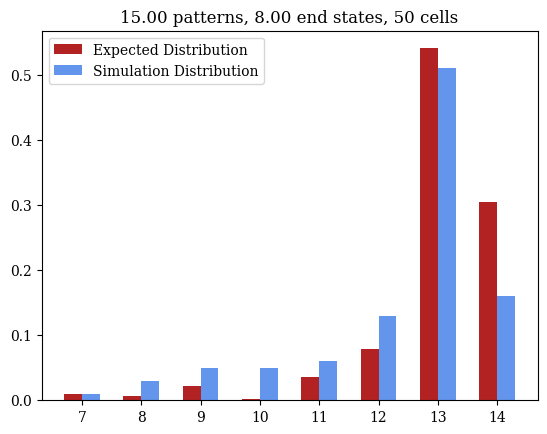

CPU times: user 15 s, sys: 47.9 ms, total: 15 s
Wall time: 15 s


In [20]:
%%time   
# Takes about 10-15 seconds to run
spins_history, overlaps, final_dist = cells_run(num_cells=100, pattern=pat_arr, T=0.25, n=4, 
                                                tau=10, lambd=lambda_matrix, biases=biases)

plt.bar(np.flip(paths[:,-1]), expected_dist, color='firebrick', align='edge', width=-0.3, label='Expected Distribution')
plt.bar(np.flip(paths[:,-1]), final_dist, color='cornflowerblue', align='edge', width=0.3, label='Simulation Distribution')
plt.title('%3.2f patterns, %3.2f end states, 50 cells'%(num_pat, len(paths)))
plt.legend()
plt.show()

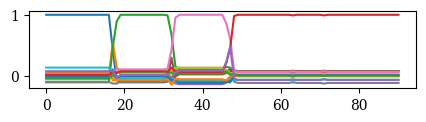

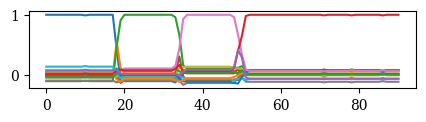

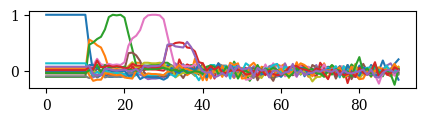

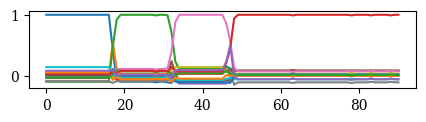

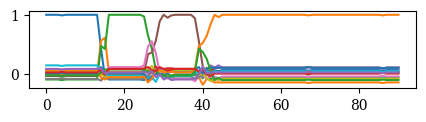

In [21]:
# Observing some sample trajectories
for j in range(5):
    plt.figure(figsize=(5,1))
    for i in range(num_pat):
        plt.plot(overlaps[j][:,i], label='pattern no.'+str(i))
    plt.show()

## Alternate Feedback mechanism

In the previous function, we used the total cell count, i.e. the total number of cells that ever took on a certain pattern, to modify $\Lambda$. Instead, we could also use the current cell count, i.e. the number of cells currently in a pattern to modify the $\lambda$ values of that branch. The function below performs this task, and the results ard fairly similar.

In [22]:
@njit
def cells_run_overlaps(num_cells, pattern, T, n, tau, lambd, biases, max_delay=10):
    p, L = np.shape(pattern)    # p = no. of patterns; L = no. of neurons
    N = p*tau + max_delay
    
    overlaps = np.zeros((num_cells, N+1, p))     # Create array to store the overlap with each pattern for each time step.
    spins_history = np.zeros((num_cells, N+1, L))    # Create array to store spin configuration at each time step
    
    for cell in range(num_cells):
        overlaps[cell][0] = p_overlap(pattern[0], pattern)
        spins_history[cell][0] = np.copy(pattern[0])

    final_dist = np.zeros((p+1)//2)
    delays = np.random.uniform(0, max_delay, num_cells).astype(np.int32)
    
    
    for run in range(N):
        cell_count = np.zeros(p)
        for cell in range(num_cells):
            if run>=delays[cell]:
                spins_history[cell][run+1] = branch_seq_sweep(pattern, spins_history[cell][run], T, 
                                                              n, tau, spins_history[cell], run-delays[cell], lambd)
                overlaps[cell][run+1] = p_overlap(spins_history[cell][run+1], pattern)
                current_pattern = np.argmax(overlaps[cell][run+1])
                cell_count[current_pattern] += 1
                
            else:
                spins_history[cell][run+1] = spins_history[cell][run]
                overlaps[cell][run+1] = overlaps[cell][run]

        for i in range(len(biases)):
            pair_1 = 2*i + 1; pair_2 = 2*i + 2
            prev_node = (pair_1 - 1)//2
            if (cell_count[pair_1]+cell_count[pair_2]) != 0:
                ratio = cell_count[pair_1]/(cell_count[pair_1]+cell_count[pair_2])
                lambd[pair_1, prev_node] = lambd[pair_2, prev_node] * (1 + biases[i][0] - ratio)

    for cell in range(num_cells):
        pat = np.argmax(overlaps[cell][-1])
        ind = pat - (p-1)//2 
        final_dist[ind] += 1
    return spins_history, overlaps, final_dist/num_cells